# Setup

## Imports

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## Set Parameters

NOTE: 1m data is only retrievable for the last 7 days, and any interval <1d is only for the last 60 days

In [20]:
startDate = "2025-6-23"
endDate = "2025-6-26"
symbol1 = "AAPL"
symbol2 = "MSFT"
timeInterval = "1m"

## Setup Data

In [28]:
# Download data for two stocks between specified dates with specified interval
data = yf.download([symbol1, symbol2], start=startDate, end=endDate, interval=timeInterval, auto_adjust=True)
# Get adjusted close prices
close = data["Close"].dropna()
close

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,MSFT
Datetime,,
2025-06-23 13:30:00+00:00,201.343002,474.859985
2025-06-23 13:31:00+00:00,200.789993,474.193115
2025-06-23 13:32:00+00:00,200.649994,474.183990
2025-06-23 13:33:00+00:00,200.910004,473.584991
2025-06-23 13:34:00+00:00,200.279999,473.304993
...,...,...
2025-06-25 19:55:00+00:00,201.350006,491.989990
2025-06-25 19:56:00+00:00,201.318695,491.959991
2025-06-25 19:57:00+00:00,201.309296,491.890015


# Engle-Granger Test

## Imports

In [22]:
from statsmodels.tsa.stattools import adfuller

## Create Least Squares Linear Model and Get Residuals

In [30]:
# Convert prices from DataFrame to NumPy arrays
X = close[symbol1].to_numpy()
Y = close[symbol2].to_numpy()
# Add constant term for regression
X = np.column_stack((np.ones(X.shape[0]), X))
# Regress Y on X to find beta_hat
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
# Calculate the Residuals (spread)
Y_hat = X @ beta_hat
spread = Y - Y_hat
spread

array([-12.65986096, -11.17806023, -10.64322894, ...,   4.5011328 ,
         4.22727367,   3.92158919], shape=(1138,))

## Plot Residuals

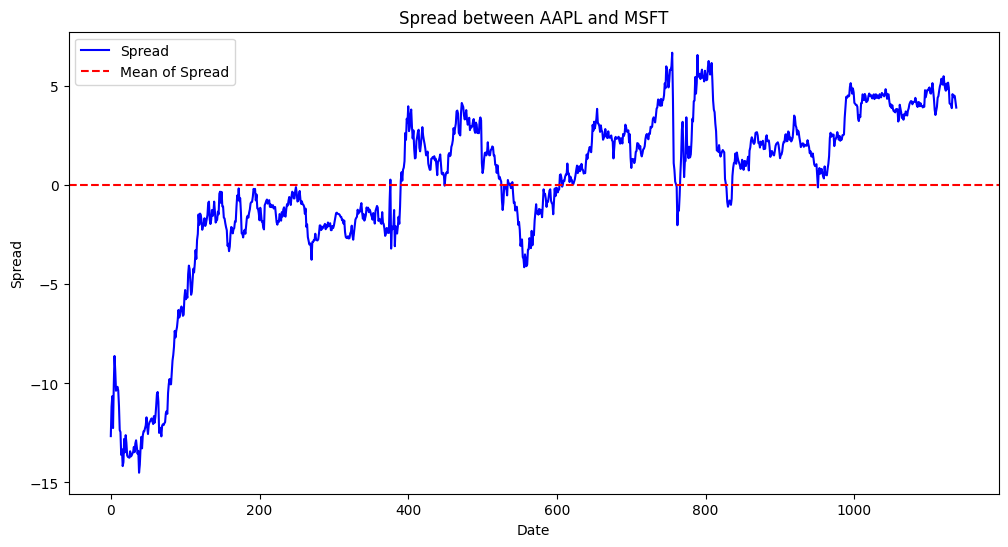

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Spread', color='blue')
plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean of Spread')
plt.title(f'Spread between {symbol1} and {symbol2}')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show() 

## Perform Augmented Dickey-Fuller Test

In [ ]:
adfuller_result = adfuller(spread)
# Print the ADF test statistic and p-value
print(f"ADF Test Statistic: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

ADF Test Statistic: -3.1127749099483064
p-value: 0.0256221195772462
